# tensorflow with linear regression


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

EPOCHS = 5

Load mnist data


In [16]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train))

60000


## 建立模型

1. 使用 Sequential 模型初始化時傳入層
   你可以在創建 Sequential 實例時一次性傳入一組層，這些層會按照你給定的順序被添加到模型中。


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
tf.keras.layers.Flatten(input_shape=(28, 28))

c:\Users\bend0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Flatten name=flatten_1, built=False>

Flatten 層：將輸入數據從多維陣列轉換為一維陣列。例如，28x28 的 2D 圖像數據會展平成一個包含 784 個元素的一維向量（28 \* 28 = 784）。
輸入形狀：(28, 28) 表示每個輸入圖像的形狀。這個層是為了準備數據，以便下一個全連接層（Dense 層）能夠接收一維的數據。
tf.keras.layers.Dense(128, activation='relu'):

Dense 層：全連接層，這層中的每個神經元都與前一層的每個神經元相連。
128 個單元：這一層有 128 個神經元。每個神經元都有一個權重和一個偏差，這些參數會在模型訓練過程中進行調整。
激活函數 (relu)：ReLU（Rectified Linear Unit）激活函數應用於這一層的輸出。該函數形式為 f(x) = max(0, x)，有助於模型學習數據中的非線性關係，並引入非線性特性以學習複雜模式。
tf.keras.layers.Dropout(0.2):

Dropout 層：這是一種正則化技術，在每次訓練更新期間，隨機將輸入單元的一部分設為 0。這樣可以防止模型過度擬合，強迫模型學習更健壯的特徵。
0.2 的比例：每次訓練迭代時，前一層中有 20% 的神經元會被隨機“丟棄”（設為 0），提高模型的泛化能力。
tf.keras.layers.Dense(10):

Dense 層：另一個全連接層，這次有 10 個神經元。
10 個單元：該層有 10 個神經元，通常對應於分類問題中的輸出類別數（例如 0-9 的 10 個數字）。
未指定激活函數：默認使用線性激活函數 (f(x) = x)。在分類任務中，這一層通常輸出 logits（未經處理的預測值），這些值可以通過 softmax 函數轉換為類別概率。 2. 使用 add() 方法逐層添加
如果你希望逐層構建模型，可以使用 add() 方法在創建模型後逐步添加層。


In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

逐層添加的優勢：
允許你逐步構建模型，這樣可以靈活地進行調整和修改。
適合在模型構建過程中逐步理解和控制模型結構。
這兩種方法都可以達到相同的效果，選擇哪一種取決於你個人的偏好和具體需求。


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
tf.keras.layers.Flatten(input_shape=(28, 28))


<Flatten name=flatten_4, built=False>

Flatten 層：將輸入數據從多維陣列轉換為一維陣列。例如，28x28 的 2D 圖像數據會展平成一個包含 784 個元素的一維向量（28 \* 28 = 784）。
輸入形狀：(28, 28) 表示每個輸入圖像的形狀。這個層是為了準備數據，以便下一個全連接層（Dense 層）能夠接收一維的數據。
tf.keras.layers.Dense(128, activation='relu'):

Dense 層：全連接層，這層中的每個神經元都與前一層的每個神經元相連。
128 個單元：這一層有 128 個神經元。每個神經元都有一個權重和一個偏差，這些參數會在模型訓練過程中進行調整。
激活函數 (relu)：ReLU（Rectified Linear Unit）激活函數應用於這一層的輸出。該函數形式為 f(x) = max(0, x)，有助於模型學習數據中的非線性關係，並引入非線性特性以學習複雜模式。
tf.keras.layers.Dropout(0.2):

Dropout 層：這是一種正則化技術，在每次訓練更新期間，隨機將輸入單元的一部分設為 0。這樣可以防止模型過度擬合，強迫模型學習更健壯的特徵。
0.2 的比例：每次訓練迭代時，前一層中有 20% 的神經元會被隨機“丟棄”（設為 0），提高模型的泛化能力。
tf.keras.layers.Dense(10):

Dense 層：另一個全連接層，這次有 10 個神經元。
10 個單元：該層有 10 個神經元，通常對應於分類問題中的輸出類別數（例如 0-9 的 10 個數字）。
未指定激活函數：默認使用線性激活函數 (f(x) = x)。在分類任務中，這一層通常輸出 logits（未經處理的預測值），這些值可以通過 softmax 函數轉換為類別概率。 2. 使用 add() 方法逐層添加
如果你希望逐層構建模型，可以使用 add() 方法在創建模型後逐步添加層。


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))


逐層添加的優勢：
允許你逐步構建模型，這樣可以靈活地進行調整和修改。
適合在模型構建過程中逐步理解和控制模型結構。
這兩種方法都可以達到相同的效果，選擇哪一種取決於你個人的偏好和具體需求。


In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)])

UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
super().**init**(\*\*kwargs)


In [22]:
# add these import
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = tf.keras.models.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(10)
    ])

#### model(x_train[:1])
將 x_train 數據集中第一個樣本（x_train[:1]）傳入模型進行預測。

#### numpy()

通常，TensorFlow 的張量（Tensor）格式是 tf.Tensor，你可以使用 .numpy() 方法將 TensorFlow 的張量轉換為 NumPy 陣列，以便更容易處理和查看數據。


In [24]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.8256783 , -0.5882328 , -0.79156864,  0.37739074,  0.28964272,
         0.3732827 ,  0.20028913, -0.5962797 ,  0.47120243,  0.10057706]],
      dtype=float32)

In [25]:
tf.nn.softmax(predictions).numpy()

array([[0.04304633, 0.054583  , 0.04453995, 0.14335814, 0.13131486,
        0.14277044, 0.12009037, 0.05414555, 0.15745784, 0.10869355]],
      dtype=float32)


#### 1. tf.keras.losses.SparseCategoricalCrossentropy
損失函數：SparseCategoricalCrossentropy 是一種常用於多分類問題的損失函數。它適用於每個樣本只屬於一個類別的情況，並且類別標籤是以整數表示的（例如，類別 0, 1, 2,...）。
工作原理：這個損失函數會計算模型輸出（logits）與真實標籤之間的差異，通過最小化這個差異來調整模型的權重，以便模型的預測越來越接近真實標籤。
#### 2. from_logits=True
from_logits=True：這個參數告訴損失函數，模型的輸出是 logits，而不是已經經過 softmax 處理的概率分佈。
Logits：Logits 是模型輸出的原始值，尚未經過 softmax 函數轉換為概率分佈。Logits 可以是任意實數（正數或負數）。
當 from_logits=True 時，SparseCategoricalCrossentropy 會在計算損失時內部應用 softmax 函數，這樣可以避免數值不穩定的問題。
如果你的模型最後一層已經使用了 softmax 激活函數來輸出概率分佈，則應該設置 from_logits=False。
#### 3. 損失函數的使用
當你設置了這個損失函數後，TensorFlow/Keras 會在每次反向傳播時自動使用它來計算模型的損失，並通過優化器（如 tf.keras.optimizers.Adam）來更新模型的權重。

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.9465173

#### 使用整個數據集進行預測

當然，在實際應用中，你通常會對整個數據集或一個批次進行預測，而不是僅僅使用一個樣本。這可以通過如下方式實現：


In [27]:
predictions = model(x_train).numpy()
predictions
tf.nn.softmax(predictions).numpy()

array([[0.04304633, 0.054583  , 0.04453995, ..., 0.05414555, 0.15745784,
        0.10869355],
       [0.06417534, 0.05289474, 0.05467996, ..., 0.07393915, 0.11566766,
        0.11422979],
       [0.11473378, 0.08118732, 0.07818837, ..., 0.07441172, 0.1119694 ,
        0.06064962],
       ...,
       [0.06555677, 0.06970892, 0.05868217, ..., 0.08643941, 0.16761741,
        0.09385776],
       [0.08532621, 0.06535769, 0.07988868, ..., 0.08918659, 0.09083305,
        0.0847019 ],
       [0.1014794 , 0.08727862, 0.0530126 , ..., 0.07087685, 0.14899941,
        0.11571901]], dtype=float32)

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train, predictions).numpy()

2.4724722

#### 1. optimizer='adam'
優化器（Optimizer）：adam 是一種常用的優化算法，結合了動量（Momentum）和 RMSprop 的優點。它能夠在訓練過程中自動調整學習率，通常在大多數情況下能夠取得不錯的結果。
adam 的特點：
自適應學習率：能根據每個參數的更新情況自動調整學習率。
動量：考慮到之前的梯度信息，能夠加快收斂速度。
低記憶體需求：適合處理大規模數據集和深度模型。
#### 2. loss=loss_fn
損失函數（Loss Function）：loss_fn 是之前定義的損失函數，這裡將其指定為模型訓練過程中要最小化的目標。
具體來說：
在多分類問題中，loss_fn 通常是 SparseCategoricalCrossentropy(from_logits=True)，這意味著損失函數會在內部處理 logits，並計算模型預測與真實標籤之間的差異。
目的是讓模型的預測更接近真實標籤，從而提高模型的準確性。
#### 3. metrics=['accuracy']
評估指標（Metrics）：metrics 是用來評估模型性能的指標。在這裡，'accuracy' 表示模型在訓練和測試過程中會計算準確率（accuracy）。
accuracy 的作用：
它是衡量模型分類性能的一個常用指標，表示模型預測正確的樣本數佔總樣本數的比例。
在多分類問題中，accuracy 計算的是模型在每個樣本上是否預測了正確的類別。

In [29]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

#### model fit : 訓練模型的主要方式
```python
model.fit(train_data, train_label, EPOCHS)
```
epochs為常數表示訓練次數。
EPOCHS = 5
指定模型將訓練 5 個 epoch。每個 epoch 都意味著模型將對整個訓練數據集進行一次完整的遍歷和學習。

##### 訓練過程
1. 初始化權重
* 在訓練開始時，模型的權重通常會被隨機初始化。這些權重將在訓練過程中逐步調整，以使模型的預測結果越來越準確。
2. 向前傳播
* 每個樣本數據會經過模型的一層層運算，最終得到一個輸出。這個過程稱為前向傳播（forward propagation）。
* 對於分類問題，這個輸出通常是 logits，表示每個類別的預測分數。
3. 損失計算
* 模型的輸出（預測值）與真實標籤進行比較，計算出一個損失值。這個損失值度量了模型預測與真實答案之間的差距，越小越好。
* 損失函數的選擇取決於問題的類型，例如對於多分類問題常用 SparseCategoricalCrossentropy。
4. 反向傳播&權重更新
* 反向傳播（backpropagation）是根據損失值來計算模型每個權重的梯度。這些梯度告訴模型在接下來的更新中，權重應該增加還是減少，以減少損失。
* 使用優化器（例如 Adam）來根據梯度更新模型的權重。這樣，模型的預測會在下一個迭代中更接近真實標籤。
5. 重複EPOCHS次
* 上述過程會在每個 epoch 中重複。每次 epoch 結束後，模型的權重會被更新，並進行下一個 epoch 的訓練。訓練結束後，模型的權重應該已經調整到使得預測誤差最小的狀態

In [30]:
model.fit(x_train, y_train, EPOCHS)

12000/12000 ━━━━━━━━━━━━━━━━━━━━ 10s 774us/step - accuracy: 0.8870 - loss: 0.3785


#### model.evaluate()

```python 
model.evaluate(x_test, y_test, verbose=2)
```
* model.evaluate() 方法是用來評估模型在新數據（通常是測試數據）上的性能表現。評估過程會對給定的數據集進行一次完整的前向傳播，並計算損失值和其他在 model.compile() 中指定的評估指標。
* x_test 和 y_test
x_test：這是測試數據集的輸入特徵，與訓練數據 x_train 的結構相同。測試數據集應該是模型之前未見過的數據，用於衡量模型的泛化能力，即模型在新數據上的表現。
y_test：這是測試數據集的真實標籤，與訓練數據 y_train 的結構相同。y_test 提供了模型的預測結果需要對比的真實值。
* verbose=2
verbose：這個參數控制了評估過程中輸出的詳盡程度。verbose 有幾個可能的值：
    0：不輸出任何信息，安靜模式。
    1：每個 epoch 都會顯示一行進度條和評估指標。
    2：只顯示每個 epoch 的最終結果，沒有進度條。這通常是在訓練或評估過程中使用的簡潔輸出模式。
1. 前向傳播：模型會對 x_test 數據集中的每個樣本進行前向傳播，計算出預測結果。
2. 計算損失和指標：根據預測結果和真實標籤 y_test，計算損失值和其他指定的評估指標（如準確率）。
3. 輸出結果：根據 verbose 的設置，顯示評估結果。
4. 返回值：返回損失值和其他指標，這些結果可以用於判斷模型在測試集上的表現。

In [31]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {round(loss,3)}")
print(f"Test Accuracy: {round(accuracy,3)}")

313/313 - 0s - 647us/step - accuracy: 0.9653 - loss: 0.1109
Test Loss: 0.111
Test Accuracy: 0.965


* 損失值和評估指標：model.evaluate() 的返回值是一個列表，第一個值是測試數據集上的損失值，後面的值是模型的其他評估指標，例如準確率。
例如，如果在 model.compile() 中指定了損失函數和準確率作為指標，則 model.evaluate() 可能會返回類似 [loss_value, accuracy_value] 的結果。

#### probability_model
* 包含兩層layer
    1. 先前定義的model
    2. Softmax layer
* Softmax 激活函數 把logits變成機率分布

```python
import numpy as np

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

# 示例向量
z = np.array([1.0, 2.0, 3.0])

# 计算 Softmax
softmax_values = softmax(z)
print("Softmax 输出:", softmax_values)

```


* 输出将是每个类别的概率分布。这对于分类任务来说非常有用，因为它不仅告诉您模型预测的类别，还给出了该预测的置信度（即概率）。

In [33]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [35]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.8569450e-06, 1.1166930e-08, 3.1653846e-05, 5.5434302e-05,
        6.5131016e-09, 1.2849872e-06, 2.1487378e-11, 9.9985993e-01,
        2.9457451e-07, 4.9508217e-05],
       [2.1169988e-07, 8.9576199e-05, 9.9463779e-01, 4.7165290e-03,
        1.1573841e-11, 2.9015448e-05, 7.4893937e-06, 1.2159423e-10,
        5.1939022e-04, 2.5139555e-09],
       [3.9534825e-06, 9.8413265e-01, 2.9219612e-03, 4.5264463e-04,
        9.0867004e-05, 2.7129008e-04, 2.4029815e-04, 1.1557430e-02,
        2.4945053e-04, 7.9526806e-05],
       [9.9249977e-01, 6.0721862e-07, 1.5390237e-03, 2.7812293e-05,
        3.2295909e-04, 6.5507920e-04, 1.0687455e-03, 3.5942374e-03,
        9.2735099e-06, 2.8252281e-04],
       [9.2896107e-06, 2.5563198e-08, 7.1208401e-06, 8.7160785e-08,
        9.9471998e-01, 2.1889809e-05, 3.4083500e-06, 2.1146848e-04,
        1.9715899e-06, 5.0247726e-03]], dtype=float32)>

Epoch 1/5
1875/1875 - 2s - 1ms/step - accuracy: 0.9162 - loss: 0.2891
Epoch 2/5
1875/1875 - 2s - 828us/step - accuracy: 0.9591 - loss: 0.1386
Epoch 3/5
1875/1875 - 1s - 790us/step - accuracy: 0.9679 - loss: 0.1071
Epoch 4/5
1875/1875 - 1s - 789us/step - accuracy: 0.9736 - loss: 0.0871
Epoch 5/5
1875/1875 - 1s - 784us/step - accuracy: 0.9764 - loss: 0.0743
313/313 - 0s - 601us/step - accuracy: 0.9765 - loss: 0.0717
Test Loss: 0.072
Test Accuracy: 0.976


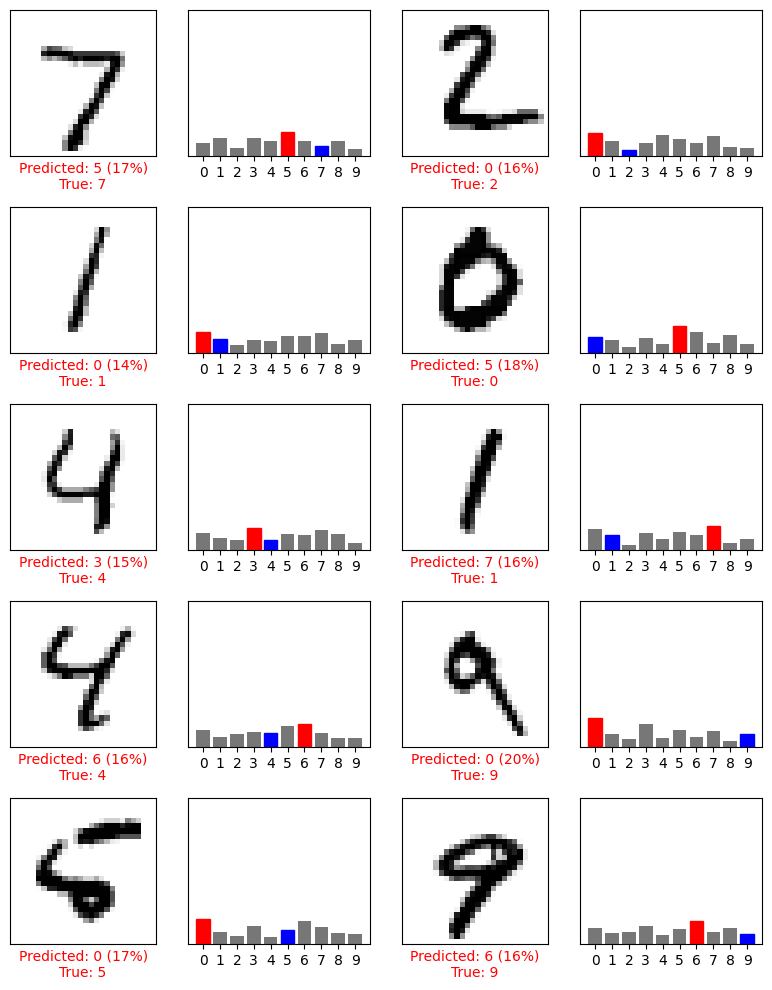

Average predictions across all test samples:
[0.12920722 0.09726123 0.06309936 0.11084317 0.07816978 0.12745093
 0.1218401  0.12274832 0.07382998 0.07554934]
Overall test accuracy: 0.9765
Average test loss: 2.3774722


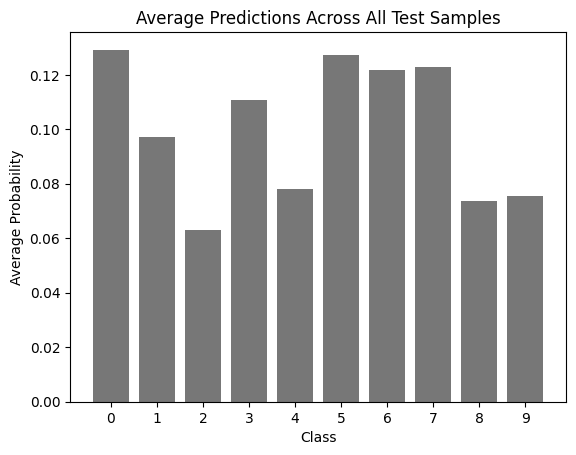

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# 載入 MNIST 數據集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 標準化數據
x_train, x_test = x_train / 255.0, x_test / 255.0

# 構建模型
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10)  # 輸出10個類別的logits
])

# 錯誤部分：使用 x_train 進行預測（這是錯誤的，因為預測時應該使用測試集 x_test）
# predictions = model(x_train[:1]).numpy()

# 正確部分：使用 x_test 進行預測
predictions = model(x_test).numpy()

# 將 logits 轉換為概率分布
softmax_predictions = tf.nn.softmax(predictions).numpy()

# 定義損失函數，並指定來自 logits
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# 編譯模型
model.compile(
    optimizer='adam',
    loss=loss_function,
    metrics=['accuracy']
)

# 訓練模型
model.fit(x_train, y_train, epochs=5, verbose=2)

# 使用測試數據評估模型
# 錯誤部分：這裡不應該使用 x_train 和 y_train 來評估模型
# loss, accuracy = model.evaluate(x_train, y_train, verbose=2)

# 正確部分：應該使用 x_test 和 y_test 來評估模型
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {round(loss, 3)}")
print(f"Test Accuracy: {round(accuracy, 3)}")

# 定義可視化函數
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"Predicted: {predicted_label} ({100*np.max(predictions_array):2.0f}%)\nTrue: {true_label}", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 可視化前5個測試樣本及其預測
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, softmax_predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, softmax_predictions, y_test)
    
plt.tight_layout()
plt.show()

# 計算平均預測概率
average_predictions = np.mean(softmax_predictions, axis=0)
print("Average predictions across all test samples:")
print(average_predictions)

# 錯誤部分：使用 x_train 進行預測並計算準確率
# predicted_labels = np.argmax(model(x_train), axis=1)
# accuracy = np.mean(predicted_labels == y_train)

# 正確部分：使用 x_test 進行預測並計算準確率
predicted_labels = np.argmax(model(x_test), axis=1)
accuracy = np.mean(predicted_labels == y_test)
print("Overall test accuracy:", accuracy)

# 計算測試集上的平均損失
average_loss = loss_function(y_test, predictions).numpy()
print("Average test loss:", average_loss)

# 可視化平均預測概率
plt.bar(range(10), average_predictions, color="#777777")
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Average Probability")
plt.title("Average Predictions Across All Test Samples")
plt.show()
